In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

def fmd_values(magnitudes, bin_width=0.1):
    """
    returns a,b,bstd, n-values

    :param magnitudes:
    :type magnitudes:
    :param bin_width:
    :type bin_width:
    :return:
    :rtype:
    """


    length = magnitudes.shape[0]
    minimum = magnitudes.min()
    average = magnitudes.mean()
    b_value = (1 / (average - (minimum - (bin_width / 2)))) * np.log10(np.exp(1))

    sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
    b_error = 2.3 * b_value ** 2 * np.sqrt(sigma_mag)

    a_value = np.log10(length) + b_value * minimum

    return a_value, b_value, b_error, length


In [4]:
# How does the b value change if the average magnitude changes but the completeness is held constant?

# How does the b value change if the average magnitude is held constant but the completeness changes?


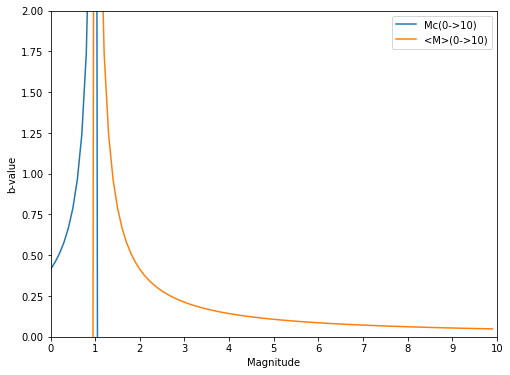

In [18]:
average = 1
average_arr = np.arange(0, 10, 0.1)
minimum = 1
minimum_arr = np.arange(0, 10, 0.1)
bin_width = 0.1
b_value_minmag = (1 / (average - (minimum_arr - (bin_width / 2)))) * np.log10(np.exp(1))
b_value_avgmag = (1 / (average_arr - (minimum - (bin_width / 2)))) * np.log10(np.exp(1))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(minimum_arr, b_value_minmag, label='Mc(0->10)')
ax.plot(average_arr, b_value_avgmag, label='<M>(0->10)')

ax.set_ylabel('b-value')
ax.set_xlabel('Magnitude')

ax.set_xticks(np.arange(0, 11, 1))

ax.set_ylim(0.0, 2.0)
ax.set_xlim(0, 10)

ax.legend()

(0, 2)

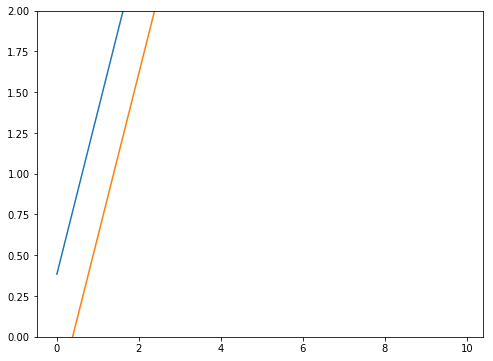

In [23]:
# solve for avg mag, set b=1
b = 1
avgmag = np.log10(np.exp(1))/b + (minimum_arr - bin_width/2)
Mc = average_arr + bin_width/2 - np.log10(np.exp(1))

fig, ax = plt.subplots(figsize=(8 ,6))

ax.plot(minimum_arr, avgmag)
ax.plot(average_arr, Mc)

ax.set_ylim(0, 2)

In [27]:
avgmag_mc = np.array([x for x in product(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))])

In [28]:
b_value_minmag = (1 / (avgmag_mc[:,0] - (avgmag_mc[:,1] - (bin_width / 2)))) * np.log10(np.exp(1))


(0, 2)

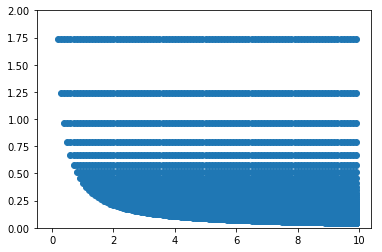

In [32]:
fig, ax = plt.subplots()
ax.scatter(avgmag_mc[:,0], b_value_minmag)

ax.set_ylim(0, 2)